In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import multivariate_normal
import matplotlib

matplotlib.rcParams.update({'font.size': 20})


# Distribution of IQ scores of a married couple modeled by bivariate normal distribution

0.47368421052631576
0.4117647058823529
Estimated of correlation coefficient: 0.44272445820433437


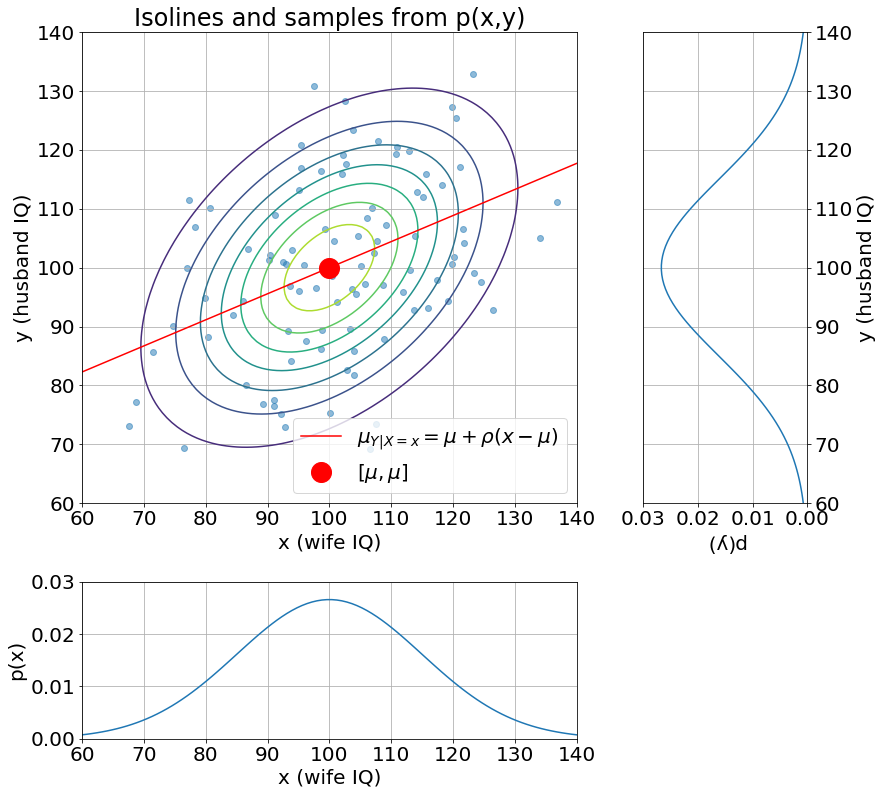

In [28]:
from matplotlib import gridspec

# Mean and standard deviation of IQ scores in the population
# Source: Google
mu=100
sigma=15

# Data about the IQ scores of the top quarter of the population
# Source: https://mindmatters.ai/2020/09/why-intelligent-women-marry-less-intelligent-men/
mean_iq_of_top_quarter_female = 119
mean_iq_of_top_quarter_female_husbands = 109

mean_iq_of_top_quarter_male = 117
mean_iq_of_top_quarter_male_wifes = 107


# Estimate correlation coeffiecient from the data
rho1 = (mean_iq_of_top_quarter_female_husbands-mu)/(mean_iq_of_top_quarter_female-mu)
rho2 = (mean_iq_of_top_quarter_male_wifes-mu)/(mean_iq_of_top_quarter_male-mu)
print(rho1)
print(rho2)
rho = (rho1+rho2)/2
print("Estimated of correlation coefficient:", rho)

#
MIN_X=60
MAX_X=140
MIN_Y=60
MAX_Y=140

# covariance matrix
cov=[[sigma**2, rho*sigma**2], [rho*sigma**2, sigma**2]]


# Figure setup
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(13)
 
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[3, 1], wspace=0.2,
                         hspace=0.25, height_ratios=[3,1])
 
ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
ax2 = fig.add_subplot(spec[2])

# Generate and plot samples from the bivariate normal distribution
n_samples = 100
points = np.random.multivariate_normal([mu,mu], cov, n_samples)    
x_sample, y_sample =  points[:,0], points[:,1]
ax0.scatter(x_sample, y_sample, alpha=0.5)

# Compute and plor isolines of the bivariate normal distribution PDF
x = np.linspace(MIN_X, MAX_X, 100)
y = np.linspace(MIN_Y, MAX_Y, 100)
X, Y = np.meshgrid(x, y)
Z = multivariate_normal.pdf(np.dstack((X, Y)), mean=[mu, mu], cov=cov)
ax0.contour(X, Y, Z)

# Plot the conditional expectation of Y given X
y0 = mu + rho * (MIN_X - mu)
y1 = mu + rho * (MAX_X - mu)
ax0.plot([MIN_X, MAX_X], [y0, y1], color='red',label='$\mu_{Y|X=x}=\mu+\\rho(x-\mu)$')
ax0.plot(mu,mu,'or',markersize=20,label='$[\mu,\mu]$')

# Set the axis limits and labels
ax0.set_xlim([MIN_X,MAX_X])
ax0.set_ylim([MIN_Y,MAX_Y])
ax0.set_title('Isolines and samples from p(x,y)')
ax0.set_xlabel('x (wife IQ)')  # Increase the label font size
ax0.set_ylabel('y (husband IQ)')  # Increase the label font size
ax0.legend(loc='lower right')
ax0.grid('on')

# Plot the marginal PDFs
y = np.linspace(MIN_Y, MAX_Y, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((y - mu) ** 2) / (2 * sigma ** 2))
ax1.plot(pdf,y)

ax1.set_ylabel("y (husband IQ)", rotation=90)
ax1.set_xlim([0,0.03])
ax1.set_ylim([MIN_Y,MAX_Y])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xlabel("p(y)", rotation=180)
ax1.invert_xaxis()
ax1.grid('on')
ax1.set_xticks([0,0.01,0.02,0.03])

# 
x = np.linspace(MIN_X, MAX_X, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((y - mu) ** 2) / (2 * sigma ** 2))
ax2.plot(x,pdf)

ax2.set_xlabel("x (wife IQ)")
ax2.set_ylabel("p(x)")
ax2.set_xlim([MIN_X,MAX_X])
ax2.set_ylim([0,0.03])
ax2.set_yticks([0,0.01,0.02,0.03])
ax2.grid('on')


# Regression to the mean for IQ scores of a married couple

x     |   mu_(Y|X=x)
100   |   100.0
105   |   102.21362229102166
110   |   104.42724458204334
115   |   106.64086687306502
120   |   108.85448916408669
125   |   111.06811145510837
130   |   113.28173374613003
135   |   115.49535603715171
140   |   117.70897832817337


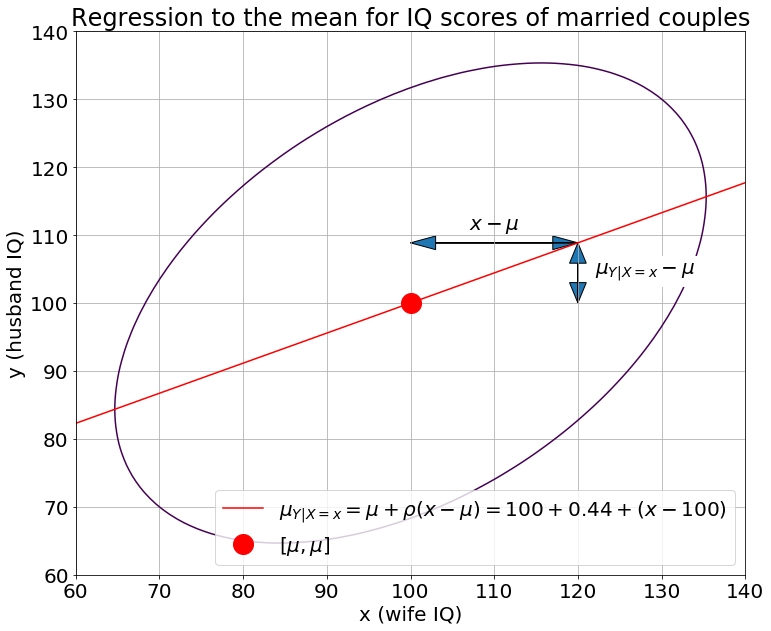

In [24]:
MIN_X=60
MAX_X=140
MIN_Y=60
MAX_Y=140
x = np.linspace(MIN_X,MAX_X, 100)
y = np.linspace(MIN_Y,MAX_Y, 100)
X, Y = np.meshgrid(x, y)

# Plot contours of the bivariate normal distribution PDF
fig, ax = plt.subplots(figsize=(12, 10))
Z = multivariate_normal.pdf(np.dstack((X, Y)), mean=[mu, mu], cov=cov)
ax.contour(X, Y, Z,levels=[multivariate_normal.pdf([130,130], mean=[mu, mu], cov=cov)])
ax.plot([MIN_X, MAX_X], [y0, y1], color='red',label='$\mu_{Y|X=x}=\mu+\\rho(x-\mu)='+f"{mu}+{rho:.2f}+(x-{mu})$")
ax.set_xlim([MIN_X,MAX_X])
ax.set_ylim([MIN_Y,MAX_Y])
ax.set_title('Regression to the mean for IQ scores of married couples')
ax.set_xlabel('x (wife IQ)')  # Increase the label font size
ax.set_ylabel('y (husband IQ)')  # Increase the label font size

# Plot the arrows depicting the regression to the mean
x = 120
delta_X= x-mu
delta_Y= rho*delta_X
ax.grid('on')
ax.arrow(mu+delta_X,mu+delta_Y,0,-delta_Y,shape='full', head_width=2,length_includes_head=True)
ax.plot(mu,mu,'or',markersize=20,label='$[\mu,\mu]$')
ax.arrow(mu+delta_X,mu,0,delta_Y,shape='full',  head_width=2,length_includes_head=True)
ax.arrow(mu,mu+delta_Y,delta_X,0,shape='full',  head_width=2,length_includes_head=True)
ax.arrow(mu+delta_X,mu+delta_Y,-delta_X,0,shape='full',  head_width=2,length_includes_head=True)
ax.text(mu+delta_X+2,mu+delta_Y*0.5,"$\mu_{Y|X=x}-\mu$",fontsize=20,bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
ax.text(mu+delta_X*0.5,mu+delta_Y+2,'$x-\mu$',fontsize=20,horizontalalignment='center')
ax.legend(loc='lower right')

# print the conditional expectation of Y given X
print("x     |   mu_(Y|X=x)")
for x in range(100,141,5):
    mu_YX=mu+rho*(x-mu)
    print(f"{x:3d}   |   {mu_YX}")



# Truncated normal distribution

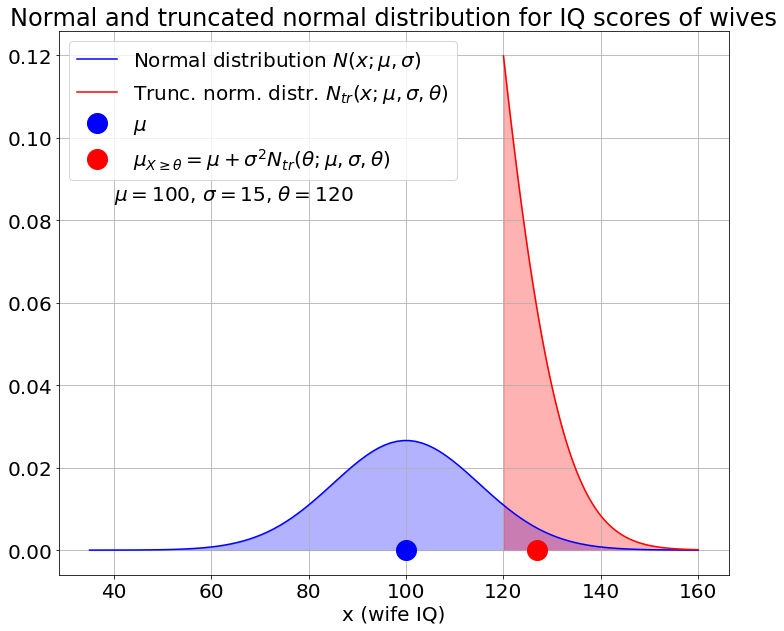

In [26]:
import scipy.stats as stats

# Figure setup
MIN_X=35
MAX_X=160
fig, ax = plt.subplots(figsize=(12, 10))

# p.d.f. of the normal distribution
x=np.linspace(MIN_X,MAX_X,100)
pdf=1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
ax.plot(x, pdf, label='Normal distribution $N(x;\mu,\sigma)$',color='blue')
ax.fill_between(x, pdf, alpha=0.3,color='blue')
ax.grid('on')

# parameter of the truncated normal distribution
theta=120

# pdf of the truncated normal distribution
x=np.linspace(theta,MAX_X,100)
pdf=stats.norm.pdf(x,mu,sigma)
phi = stats.norm.cdf((theta-mu)/(sigma), 0, 1)
pdf=pdf/(1-phi)

# expected value of the truncated normal distribution
mu_X_trunc=mu+(sigma**2)*stats.norm.pdf(theta,mu,sigma)/(1-phi)

# Plot the truncated normal distribution
ax.plot(x, pdf, label='Trunc. norm. distr. $N_{tr}(x;\mu,\sigma,\\theta)$',color='red')
ax.fill_between(x, pdf, alpha=0.3,color='red')
ax.plot(mu,0,'ob',markersize=20,label='$\mu$')
ax.plot(mu_X_trunc,0,'or',markersize=20,label='$\mu_{X\geq \\theta}=\mu+\sigma^2 N_{tr}(\\theta;\mu,\sigma,\\theta) $')
ax.text(40,0.085,f"$\mu={mu}$, $\sigma={sigma}$, $\\theta={theta}$")
ax.set_xlabel('x (wife IQ)')
ax.set_title('Normal and truncated normal distribution for IQ scores of wives')
ax.legend(loc='upper left')

# Reversion to the mean for IQ scores of a married couple

theta | mu_(X>=theta) | mu_(Y|X>=theta)
 70   | 100.8         | 100.4
 80   | 102.7         | 101.2
 90   | 106.4         | 102.8
100   | 112.0         | 105.3
110   | 119.0         | 108.4
120   | 127.0         | 111.9
130   | 135.6         | 115.8


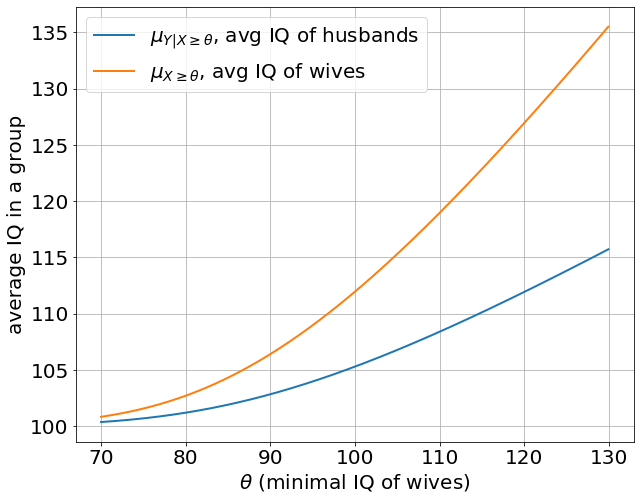

In [27]:
iq = np.arange(70,130,0.1)
avg_wife_iq = np.zeros_like(iq)
avg_husband_iq = np.zeros_like(iq)
for i, theta in enumerate(iq):
    phi = stats.norm.cdf((theta-mu)/(sigma), 0, 1)
    avg_wife_iq[i]=mu+(sigma**2)*stats.norm.pdf(theta,mu,sigma)/(1-phi)
    avg_husband_iq[i] = mu + rho*(avg_wife_iq[i] - mu  )

plt.figure(figsize=(10, 8))
plt.plot(iq,avg_husband_iq,label="$\mu_{Y|X\geq\\theta}$, avg IQ of husbands",linewidth=2)
plt.plot(iq,avg_wife_iq,label="$\mu_{X\geq\\theta}$, avg IQ of wives",linewidth=2)
plt.xlabel("$\\theta$ (minimal IQ of wives)")
plt.ylabel("average IQ in a group")
plt.legend()
plt.grid(True)


print("theta | mu_(X>=theta) | mu_(Y|X>=theta)")
avg_wife_iq = np.zeros_like(iq)
avg_husband_iq = np.zeros_like(iq)
for theta in np.arange(70,140,10):
    phi = stats.norm.cdf((theta-mu)/sigma, 0, 1)
    avg_wife_iq=mu+(sigma**2)*stats.norm.pdf(theta,mu,sigma)/(1-phi)
    avg_husband_iq = mu + rho*(avg_wife_iq - mu  )
    print(f"{theta:3d}   | {avg_wife_iq:5.1f}         | {avg_husband_iq:5.1f}")